# Laboratorio 3

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parte 1 Numpy

### Ejercicio 1

In [82]:
sample = [True, False]
bool = np.random.choice(sample, size=1000)
print("Tamaño en bytes: ", bool.nbytes)

Tamaño en bytes:  1000


### Ejercicio 2

In [83]:
num = np.arange(1000, 1, -2, dtype=int)
num[490:500]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

### Ejercicio 3

In [84]:
a = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])
a

array([[2, 4, 5, 6],
       [0, 3, 7, 4],
       [8, 8, 5, 2],
       [1, 5, 6, 1]])

In [85]:
a[1:2]

array([[0, 3, 7, 4]])

In [86]:
a[::2, ::2]

array([[2, 5],
       [8, 5]])

### Ejercicio 4

In [87]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

In [88]:
resta = np.subtract(a, b)
resta

array([ 0,  1,  0, -2])

In [89]:
media = np.mean(resta)
media

-0.25

### Ejercicio 5

In [90]:
cor = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
cor = np.append(cor, [[37.1, -3.6]], axis=0)
cor.shape

(4, 2)

### Ejercicio 6

In [91]:
cor = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
cor = np.append(cor, [[10.8, 3.0], [35.8, 12.0]], axis=0)
cor

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [10.8 ,  3.  ],
       [35.8 , 12.  ]])

In [92]:
corT = np.transpose(cor)
corT

array([[ 1.33, 30.  , 70.2 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 ,  3.  , 12.  ]])

## Parte 1 Exploración y Minería de Datos

In [93]:
df = pd.read_csv('NucleosPoblacion.csv', sep=',', index_col=0)
df

,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
FID,,,,,,,,,
0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...
847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715


### Ejercicio 1

In [94]:
mun = df[df['Poblacion'] > 100000]
mun['Municipio'].shape

(62,)

### Ejercicio 2
### Madrid Ciudad mas poblada
### Granda en el puesto 36

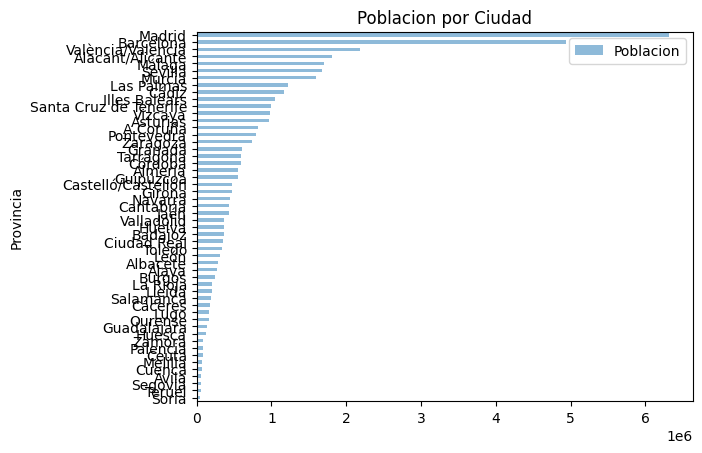

In [95]:
poblacion = df[['Provincia', 'Poblacion']].groupby(by= ['Provincia']).aggregate('sum').sort_values('Poblacion',ascending=True)
poblacion.plot(kind='barh', alpha = 0.5)
plt.title('Poblacion por Ciudad')
plt.show()

### Ejercicio 3

In [96]:
ext = df[df['Provincia'] == 'Extremadura']
ext

,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
FID,,,,,,,,,


### Ejercicio 4

In [97]:
norte = df[df['Y'] == df['Y'].max()]
norte[['Municipio', 'Provincia', 'Poblacion']]

,Municipio,Provincia,Poblacion
FID,,,
104,Viveiro,Lugo,16211.0


### Ejercicio 5

In [98]:
gr = df[df['Provincia'] == 'Granada']
gr[['Provincia','Poblacion']].groupby(by= ['Provincia']).aggregate(['mean','median','std', 'max', 'min'])

Poblacion                                          
               mean   median           std       max      min
Provincia                                                    
Granada    30217.85  17526.0  50355.491715  239154.0  10386.0

### Ejercicio 6

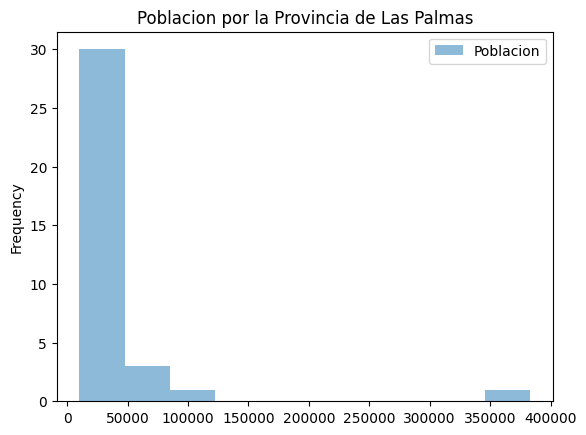

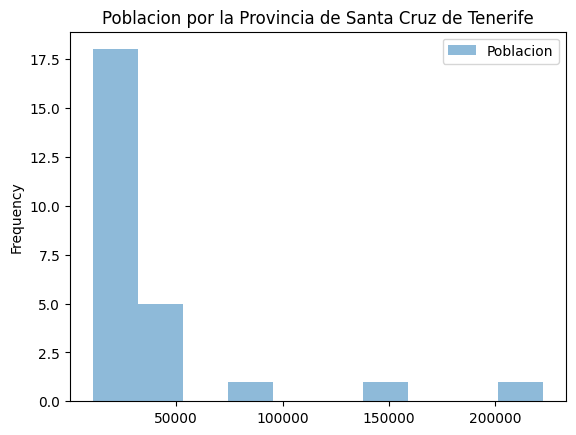

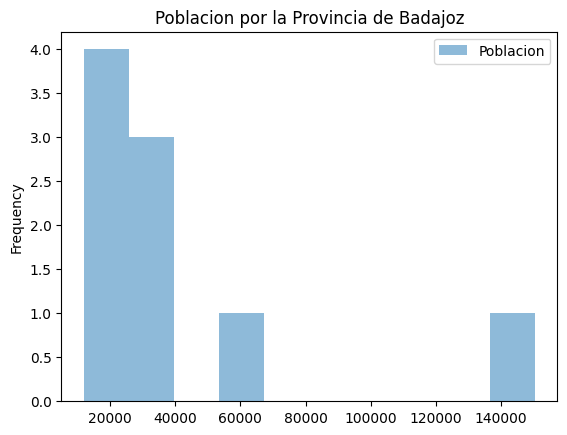

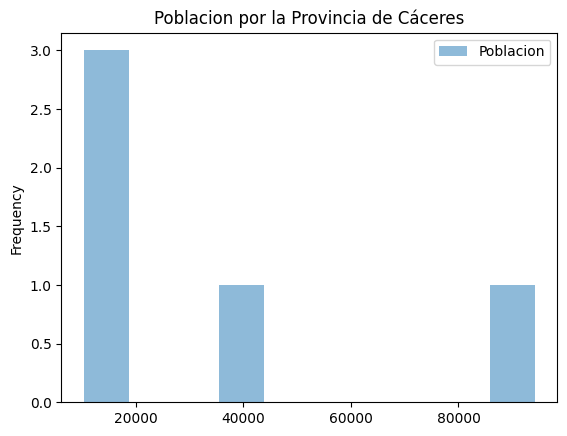

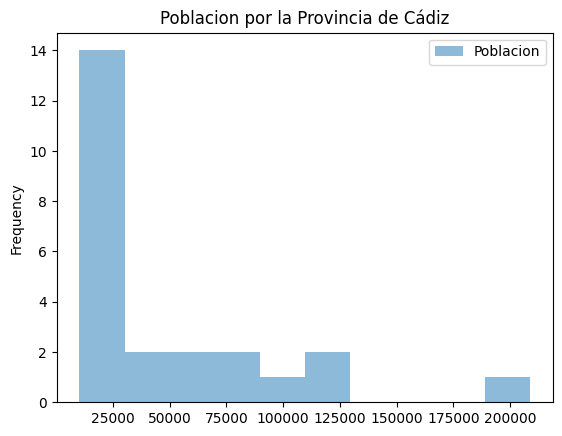

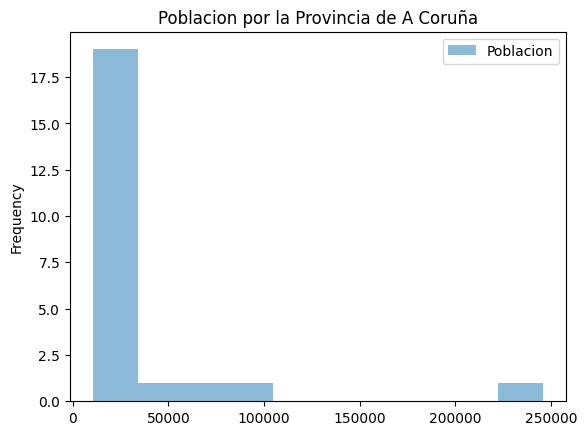

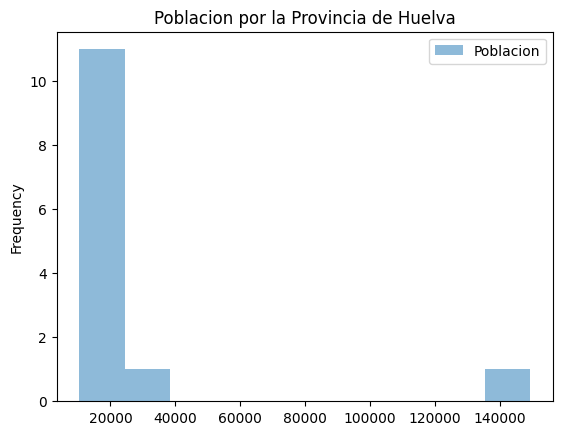

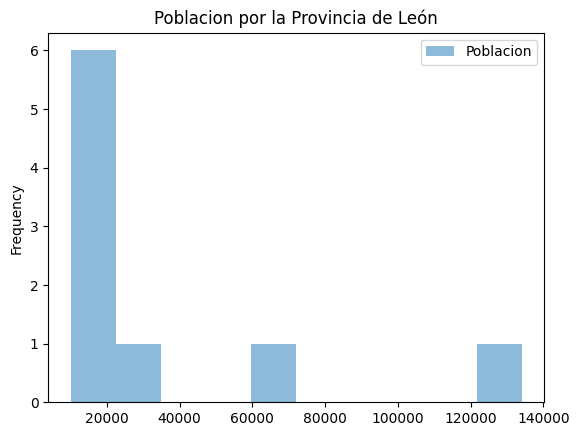

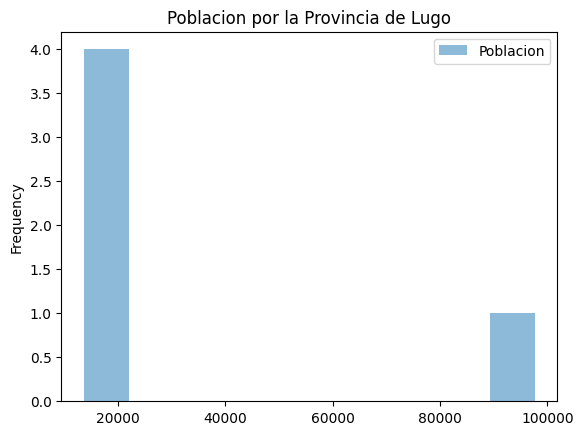

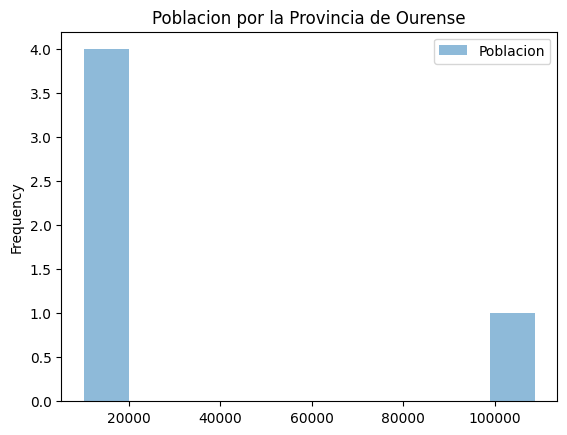

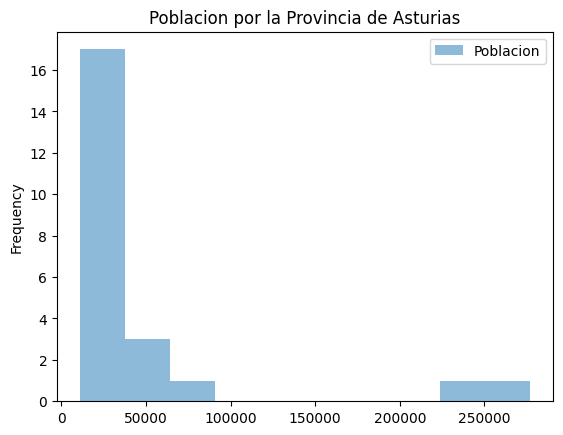

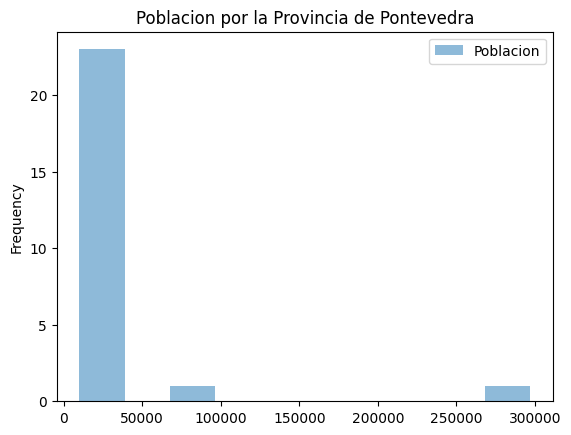

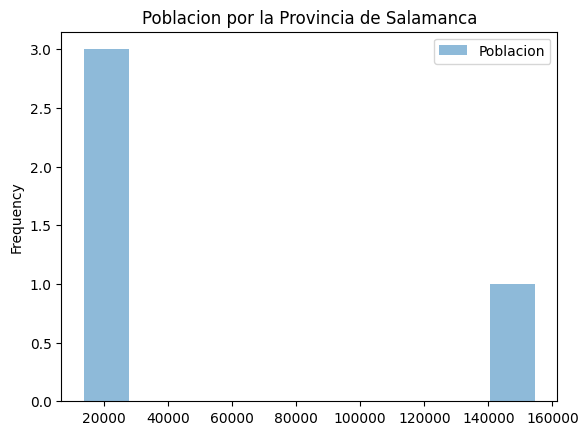

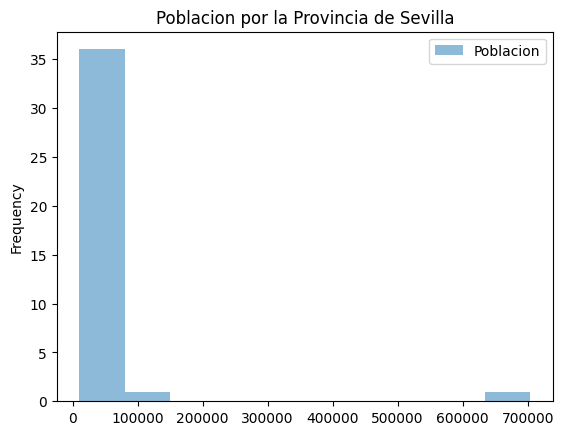

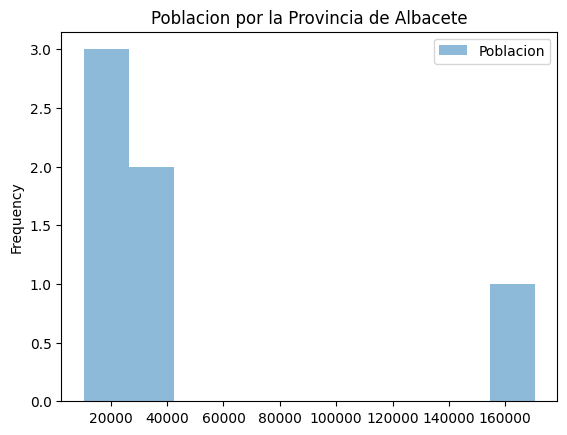

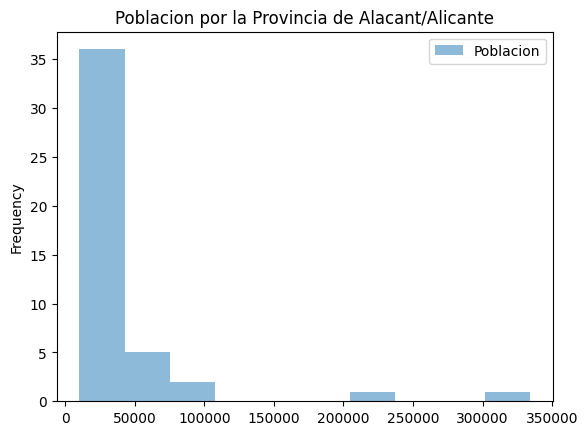

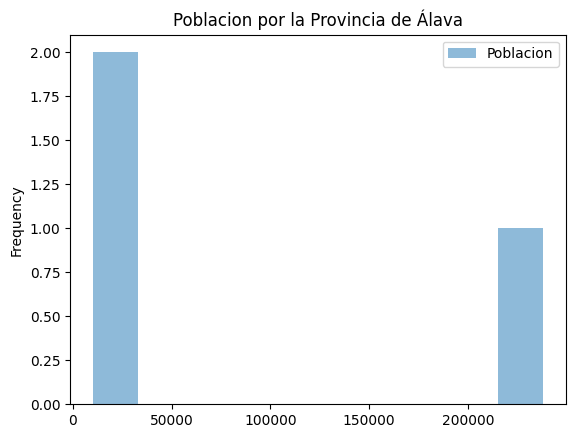

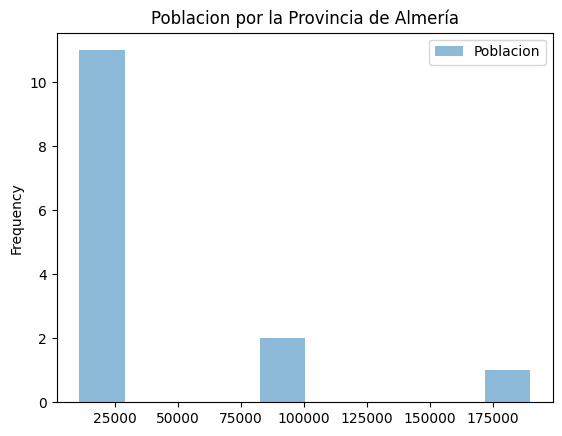

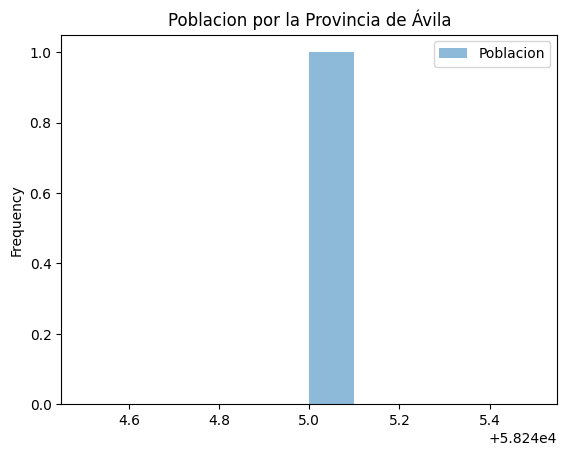

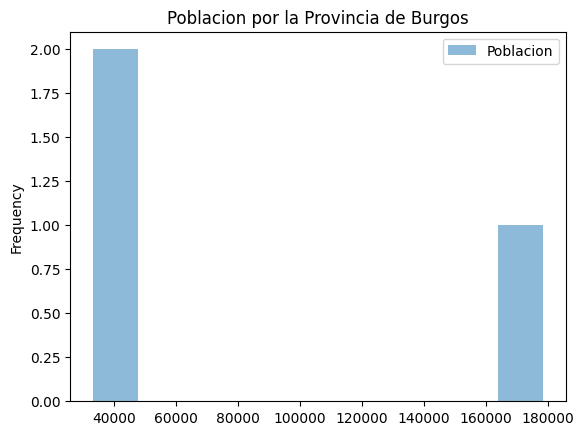

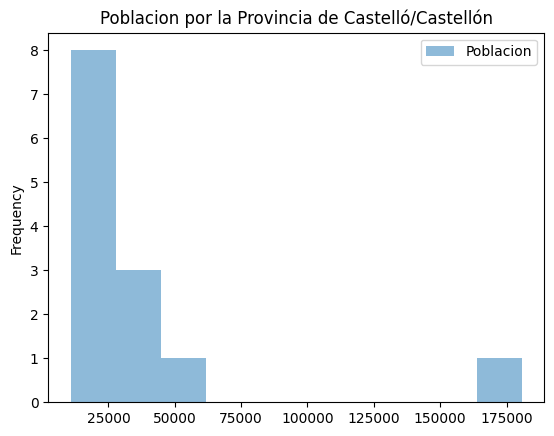

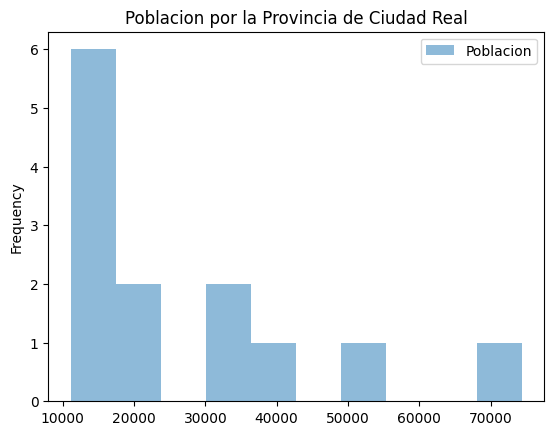

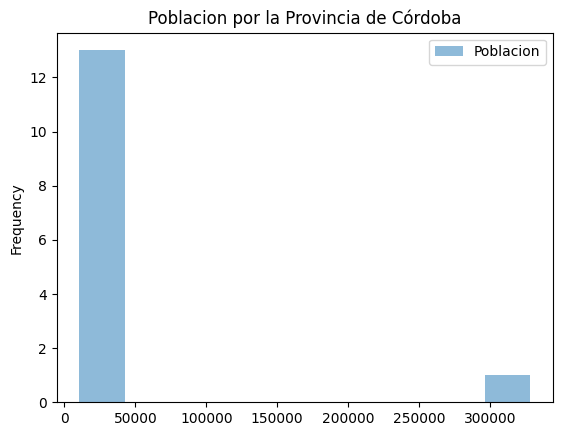

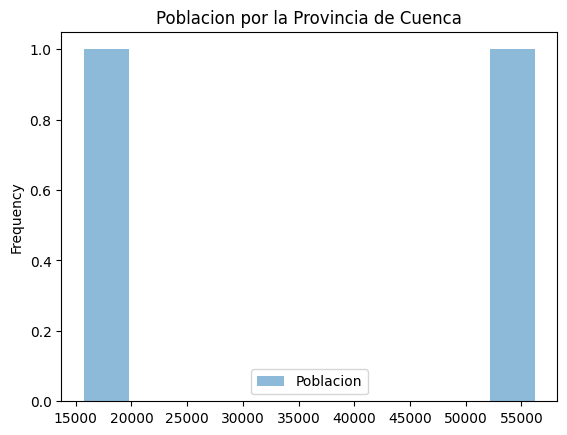

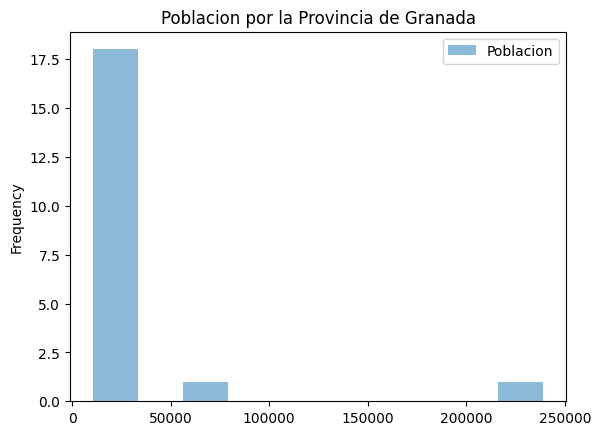

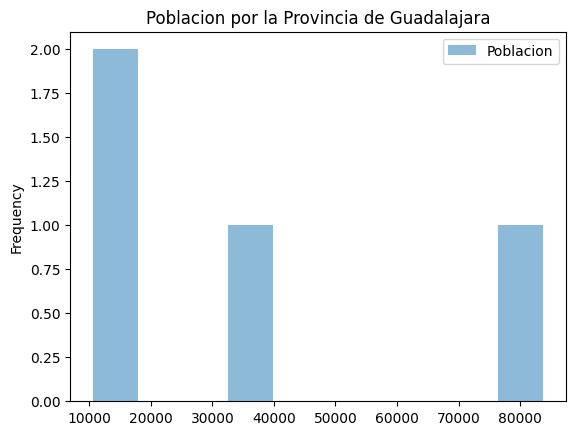

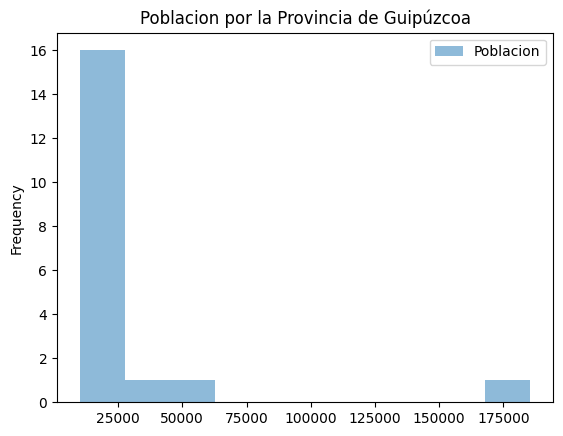

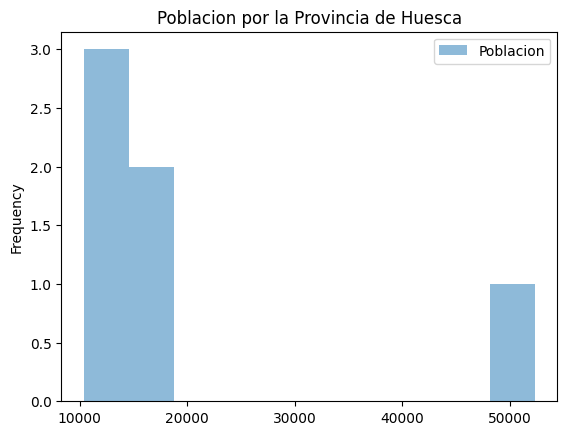

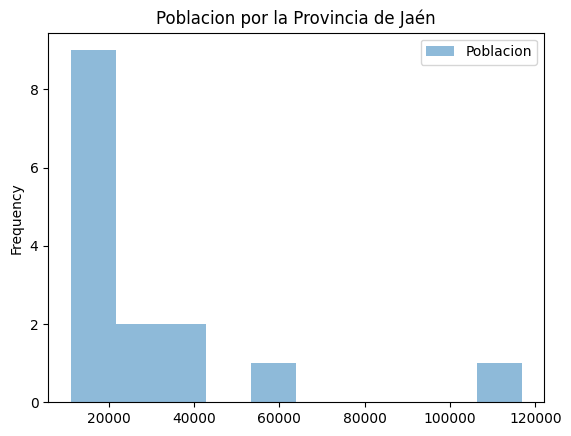

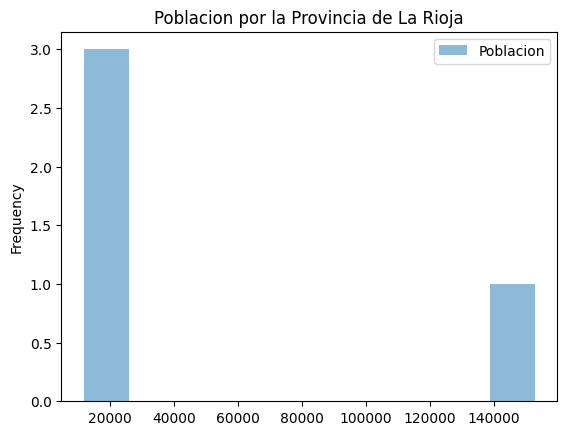

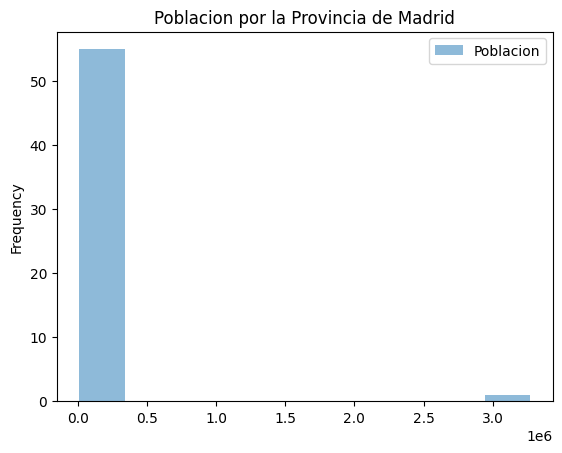

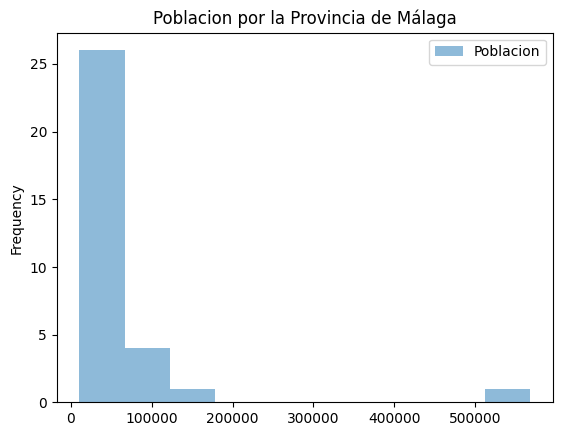

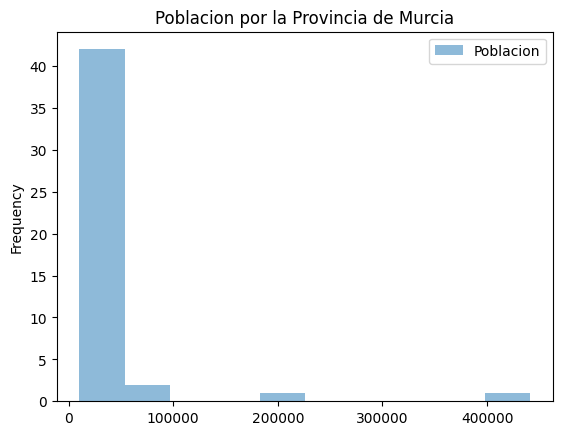

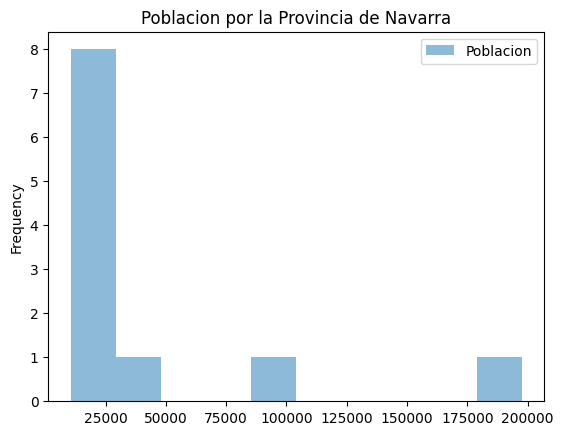

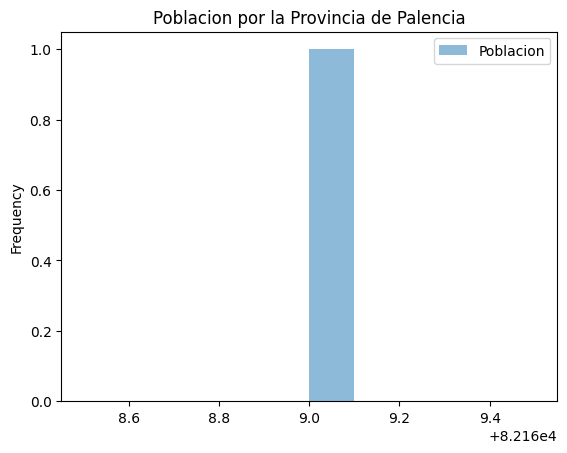

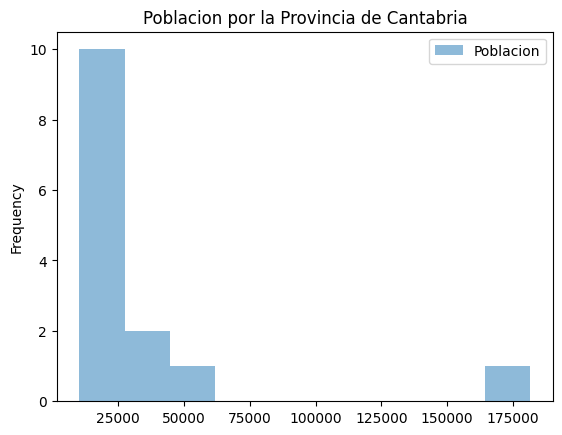

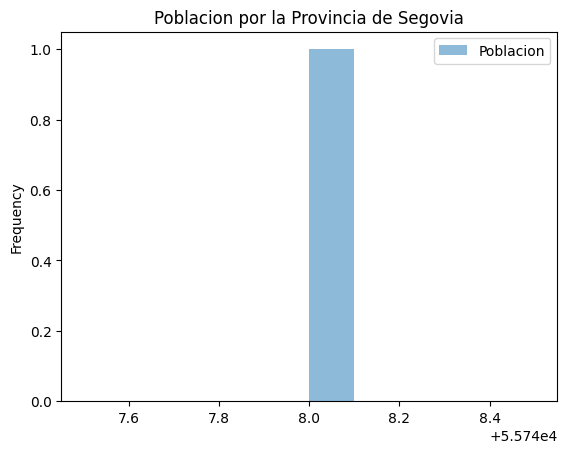

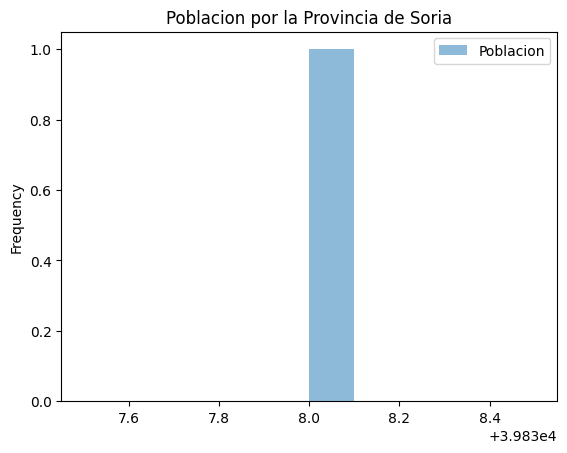

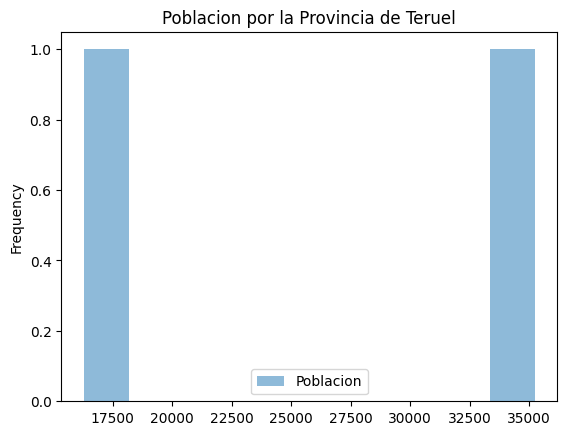

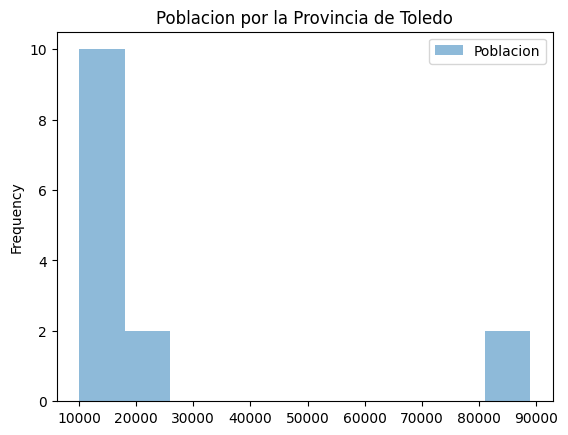

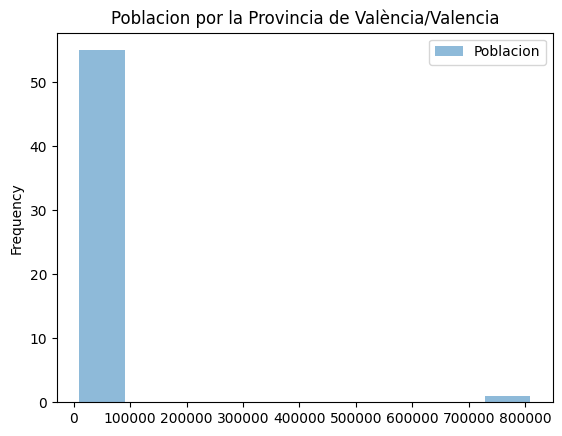

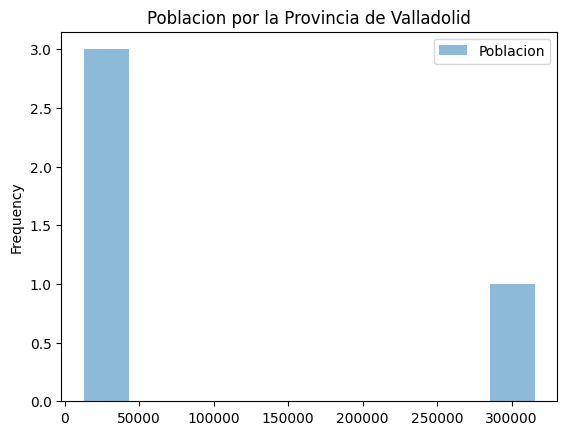

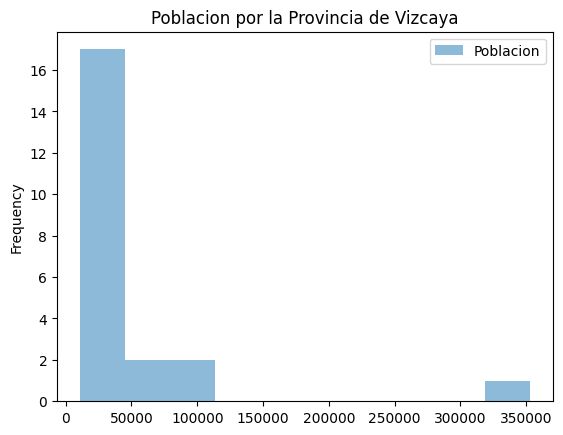

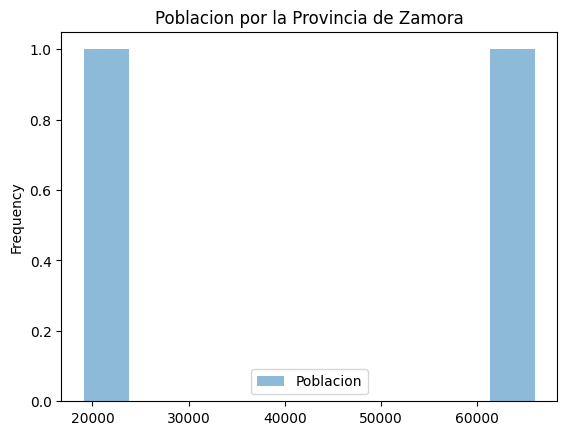

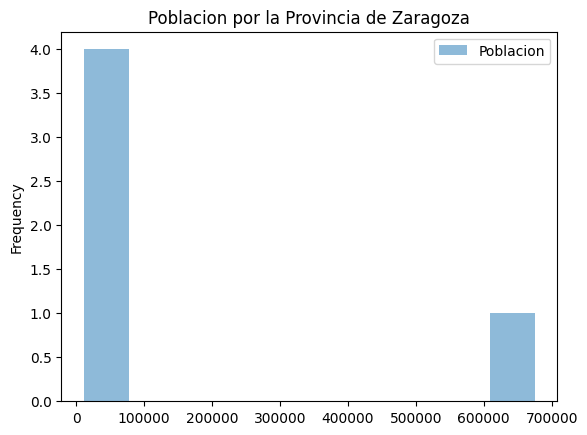

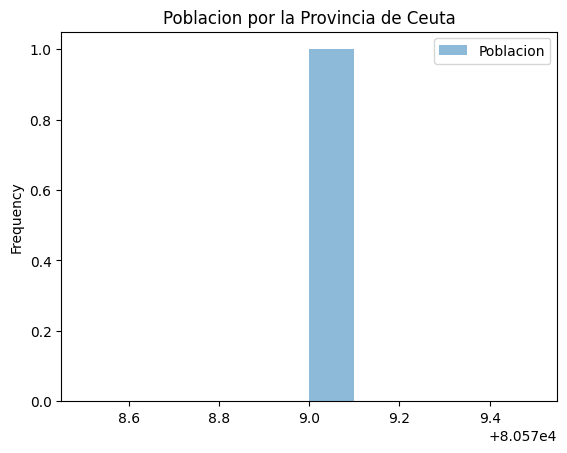

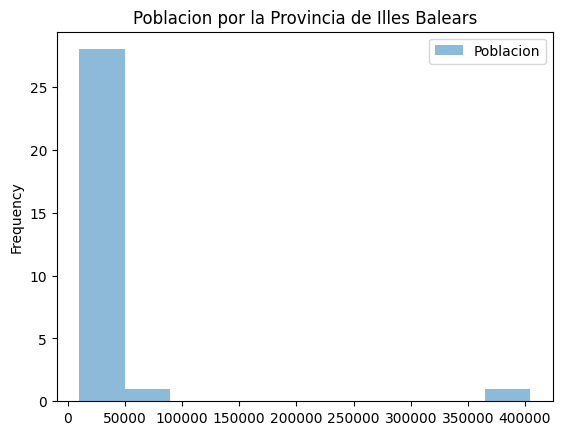

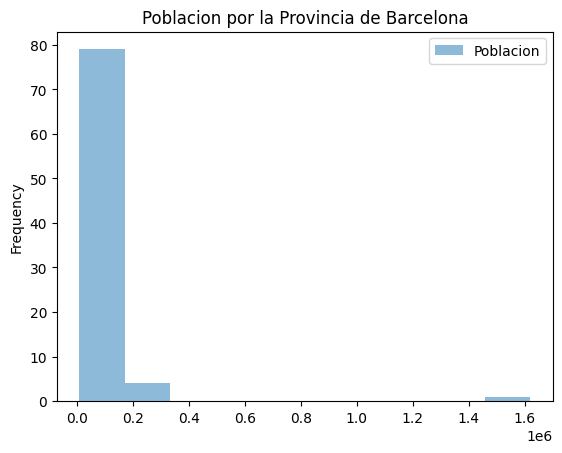

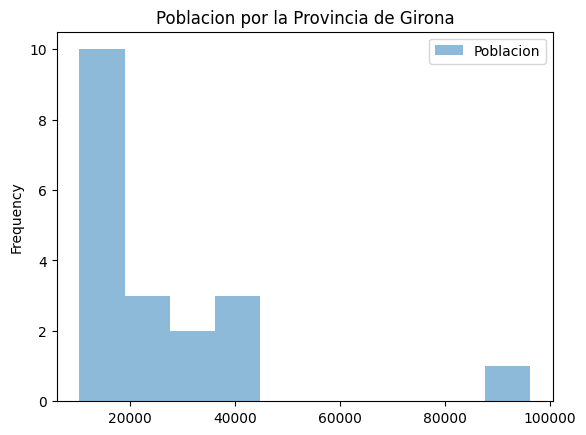

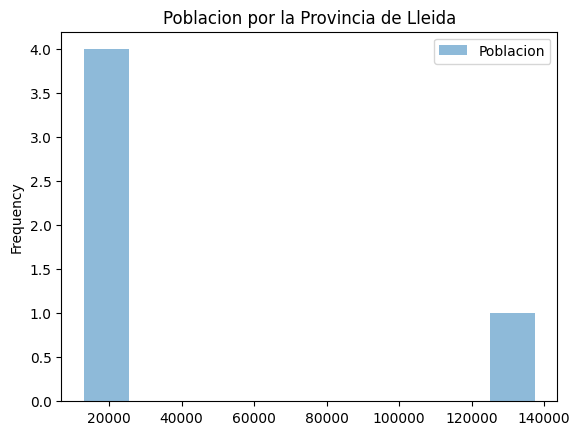

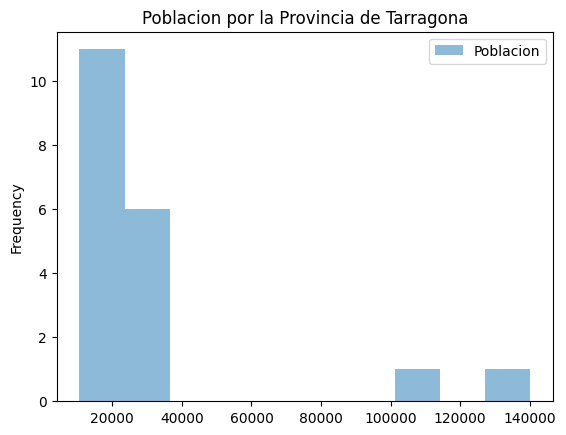

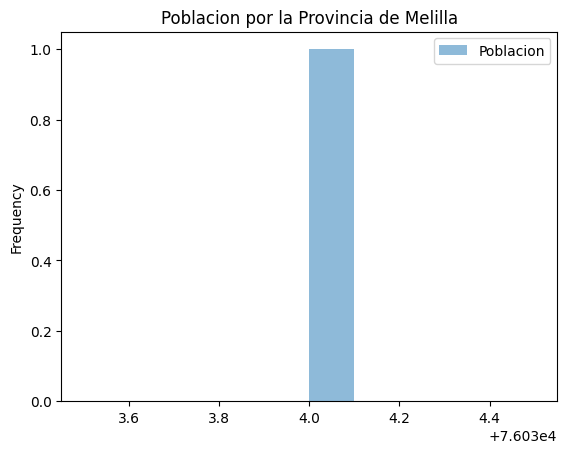

In [99]:
prv = df['Provincia'].unique()
for i in prv:
    gr = df[df['Provincia'] == i]
    a = gr[['Municipio','Poblacion']].set_index('Municipio')
    a.plot(kind='hist', alpha = 0.5)
    plt.title('Poblacion por la Provincia de {}' .format(i))
    plt.show()  


### Ejercicio 7

In [100]:
uni = df.sample(n=50)
uni[['Municipio','Poblacion']].groupby(by= ['Municipio']).aggregate(['mean','std'])

Poblacion    
                             mean std
Municipio                            
Albox                     11042.0 NaN
Aldaia                    30303.0 NaN
Arteixo                   30255.0 NaN
Atarfe                    15945.0 NaN
Avilés                    84202.0 NaN
Ayamonte                  20597.0 NaN
Benaguasil                11144.0 NaN
Burlada/Burlata           18389.0 NaN
Canet de Mar              13915.0 NaN
Cangas                    25913.0 NaN
Cangas del Narcea         14445.0 NaN
Cuevas del Almanzora      12891.0 NaN
Cádiz                    125826.0 NaN
Durango                   28261.0 NaN
Elgoibar                  11324.0 NaN
Estella/Lizarra           14207.0 NaN
Fuenlabrada              198973.0 NaN
Gavà                      46383.0 NaN
Ingenio                   12429.0 NaN
La Algaba                 15255.0 NaN
La Vall d'Uixó            32983.0 NaN
Laredo                    12378.0 NaN
Las Rozas de Madrid       88065.0 NaN
Llucmajor                 36681.0 NaN
Lorca                     59683.0 NaN
Mancha Real               11088.0 NaN
Medina del Campo          21632.0 NaN
Mejorada del Campo        22812.0 NaN
Mogán                     22638.0 NaN
Molina de Segura          65815.0 NaN
Mos                       14818.0 NaN
Orihuela                  87113.0 NaN
Palafrugell               22622.0 NaN
Parets del Vallès         10545.0 NaN
Pilar de la Horadada      22555.0 NaN
Ripoll                    10991.0 NaN
Sabiñánigo                10383.0 NaN
San Javier                31820.0 NaN
Santa Cruz de la Palma    17128.0 NaN
Santa Lucía de Tirajana   11583.0 NaN
Santiago de Compostela    94824.0 NaN
Seseña                    17522.0 NaN
Talavera de la Reina      88986.0 NaN
Teror                     12944.0 NaN
Torroella de Montgrí      11522.0 NaN
Utrera                    51177.0 NaN
Vejer de la Frontera      12876.0 NaN
Vic                       40422.0 NaN
Xirivella                 30910.0 NaN
Zamora                    65998.0 NaN